- 导包

In [56]:
import numpy as np 
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

- 查看图片,显示图片

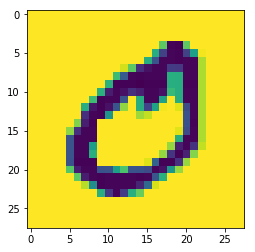

In [57]:
img=plt.imread('data/0/0_2.bmp')
plt.imshow(img)

In [58]:
img.shape #(28, 28)

(28, 28)

- 提炼样本数据

In [59]:
feature=[]
target=[]
for i in range(10):
    for j in range(500):
        img_arr=plt.imread(f'data/{i}/{i}_{j+1}.bmp')
        feature.append(img_arr)
        target.append(i)


In [60]:
feature=np.array(feature)
target=np.array(target)

In [61]:
feature.shape

(5000, 28, 28)

- #输入数据必须是二维数组,必须对feature降维<br>
(1)降维方式一:mean()
(2)降维方式二:reshape()

In [62]:
feature=feature.reshape(5000,28*28)

- 将样本打乱

In [63]:
np.random.seed(5)
np.random.shuffle(feature)
np.random.seed(5)
np.random.shuffle(target)

- 数据分割为训练数据和测试数据

In [64]:
x_train=feature[:4950]
y_train=target[:4950]
x_test=feature[-50:]
y_test=target[-50:]

- KNN模型建立和预测

In [65]:
knn=KNeighborsClassifier(n_neighbors=10)

In [66]:
#训练模型
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
#评分
knn.score(x_train,y_train)

0.945050505050505

In [68]:
#预测
# knn.predict(x_test)

- 真实预测手写数字图片的一般流程



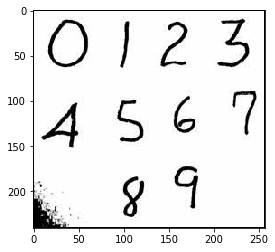

In [69]:
# 读取图片数据
num_img_arr=plt.imread('../../数字.jpg')
plt.imshow(num_img_arr)

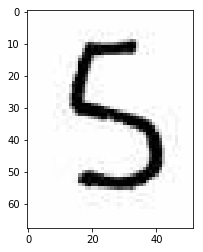

In [70]:
#图片截取数字4
five_arr=num_img_arr[90:158,80:132]
plt.imshow(five_arr)

(68, 52, 3)
(68, 52)


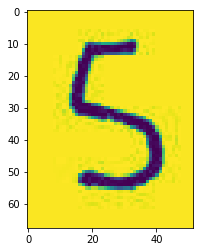

In [71]:
#降维操作(five数组是三维的，需要进行降维，舍弃第三个表示颜色的维度)
print(five_arr.shape) #(65, 56, 3)
five=five_arr.mean(axis=2)
print(five.shape) #(65, 56)
plt.imshow(five)

In [72]:
# 图片压缩为像素28*28
import scipy.ndimage as ndimage
five = ndimage.zoom(five,zoom = (28/68,28/52))

In [73]:
five.shape

(28, 28)

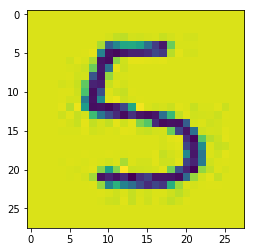

In [74]:
# 压缩后的5的显示
plt.imshow(five)

In [75]:
# 把数据降维为feature 数据格式
five.reshape(1,28*28)

array([[ 2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000000e+02,  2.54000000e+02,  2.54000000e+02,
         2.54000007e+02,  2.54000066e+02,  2.54000606e+02,
         2.54003958e+02,  2.53990795e+02,  2.54085770e+02,
         2.53998692e+02,  2.54000426e+02,  2.54007108e+02,
         2.53977165e+02,  2.54035200e+02,  2.54011278e+02,
         2.53932421e+02,  2.54035963e+02,  2.54018613e+02,
         2.53992456e+02,  2.53987061e+02,  2.53998933e+0

In [76]:
knn.predict(five.reshape(1,28*28))

array([5])